# Objective Project

**Objective:**

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


**Tentang Organisasi:**

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

**Permasalahan:**

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

**Penjelasan kolom fitur:**

Negara : Nama negara

Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran

Ekspor : Ekspor barang dan jasa perkapita

Kesehatan: Total pengeluaran kesehatan perkapita

Impor: Impor barang dan jasa perkapita

Pendapatan: Penghasilan bersih perorang

Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 

Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama

Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama

GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

# Library Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Membaca Data Set

In [ ]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Exploratory Data Analysis

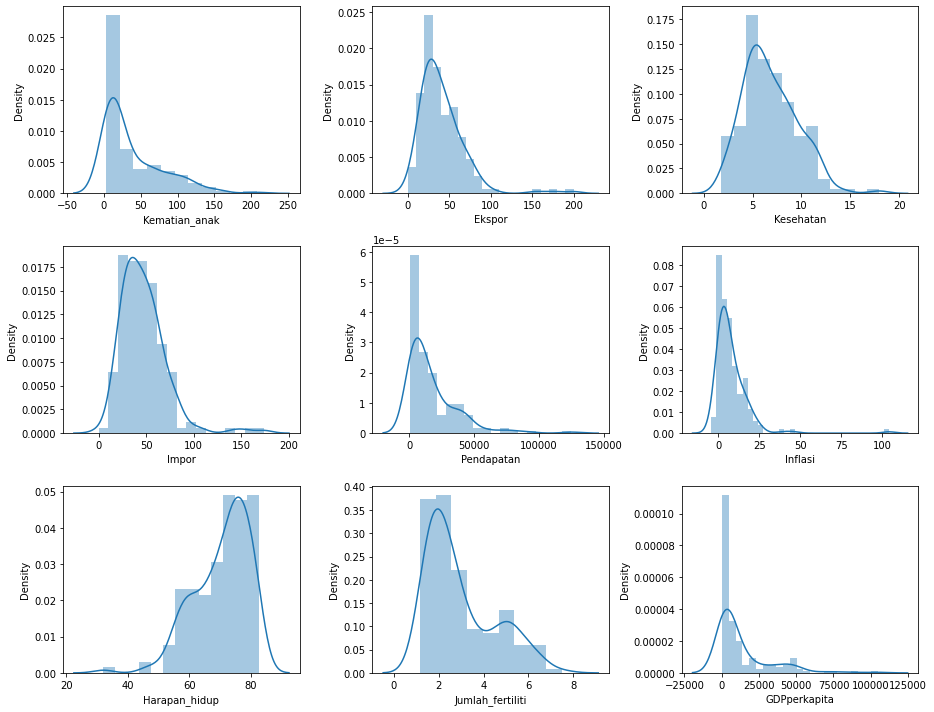

In [ ]:
plt.figure(figsize=(13,10))
for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

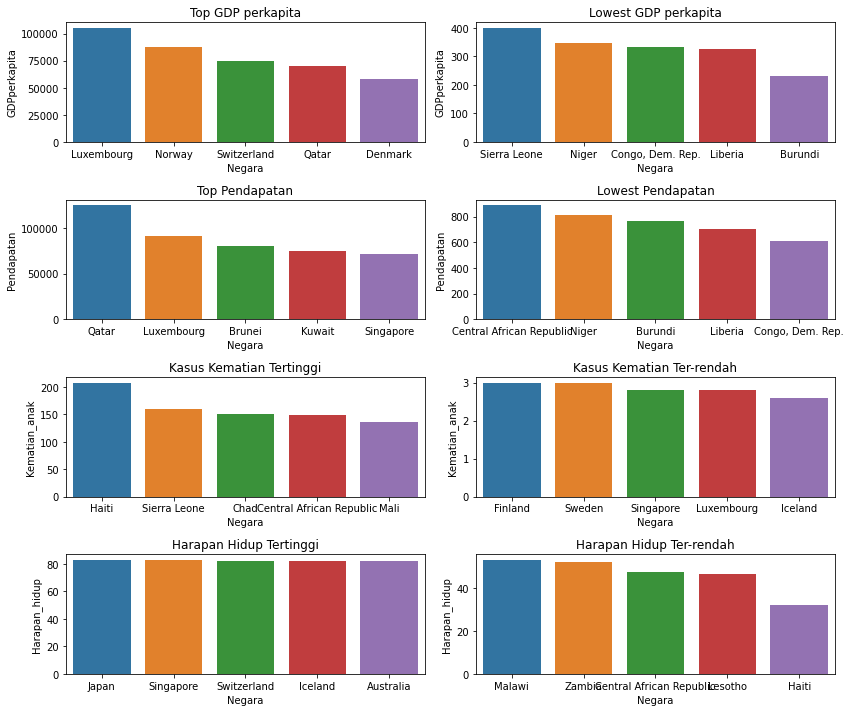

In [ ]:
GDPperkapita = df.sort_values('GDPperkapita', ascending=False)
pendapatan = df.sort_values('Pendapatan', ascending=False)
kematian = df.sort_values('Kematian_anak', ascending=False)
harapan = df.sort_values('Harapan_hidup', ascending=False)

plt.figure(figsize=(12,10))
plt.subplot(4,2,1)
sns.barplot(GDPperkapita['Negara'].head(), GDPperkapita['GDPperkapita'].head())
plt.title('Top GDP perkapita')
plt.subplot(4,2,2)
sns.barplot(GDPperkapita['Negara'].tail(), GDPperkapita['GDPperkapita'].tail())
plt.title('Lowest GDP perkapita')
plt.subplot(4,2,3)
sns.barplot(pendapatan['Negara'].head(), pendapatan['Pendapatan'].head())
plt.title('Top Pendapatan')
plt.subplot(4,2,4)
sns.barplot(pendapatan['Negara'].tail(), pendapatan['Pendapatan'].tail())
plt.title('Lowest Pendapatan')
plt.subplot(4,2,5)
sns.barplot(kematian['Negara'].head(), kematian['Kematian_anak'].head())
plt.title('Kasus Kematian Tertinggi')
plt.subplot(4,2,6)
sns.barplot(kematian['Negara'].tail(), kematian['Kematian_anak'].tail())
plt.title('Kasus Kematian Ter-rendah')
plt.subplot(4,2,7)
sns.barplot(harapan['Negara'].head(), harapan['Harapan_hidup'].head())
plt.title('Harapan Hidup Tertinggi')
plt.subplot(4,2,8)
sns.barplot(harapan['Negara'].tail(), harapan['Harapan_hidup'].tail())
plt.title('Harapan Hidup Ter-rendah')

plt.tight_layout()
#plt.savefig('Univariate_Analysis.png')
plt.show()

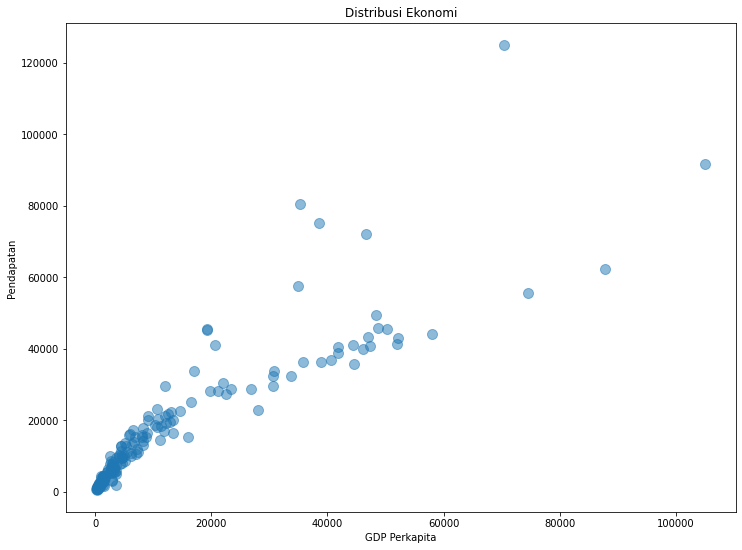

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(x='GDPperkapita', y='Pendapatan', data=df, s=100, alpha=0.5, cmap='plasma', )
plt.xlabel('GDP Perkapita')
plt.ylabel('Pendapatan')
plt.title('Distribusi Ekonomi')
#plt.savefig('Bivariate_Analysis.png')
plt.show()

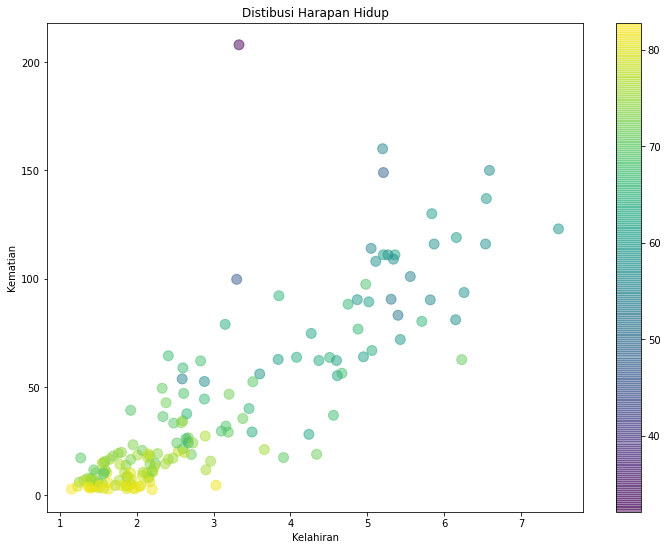

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(x='Jumlah_fertiliti', y='Kematian_anak', data=df, s=100, c='Harapan_hidup', alpha=0.5)
plt.colorbar()
plt.xlabel('Kelahiran')
plt.ylabel('Kematian')
plt.title('Distibusi Harapan Hidup')
#plt.savefig('Bivariate_Analysis_2.png')
plt.show()

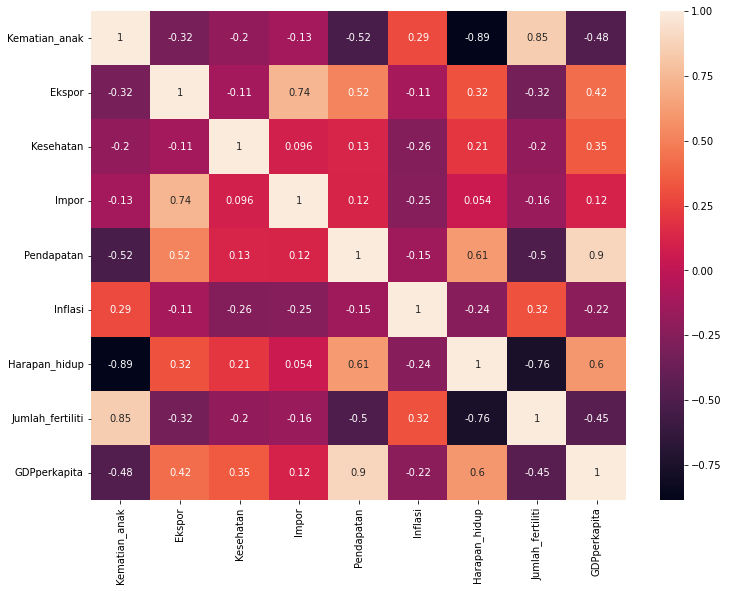

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
#plt.savefig('Multivariate_Analysis.png')
plt.show()

# Outlier Treatment

Outlier


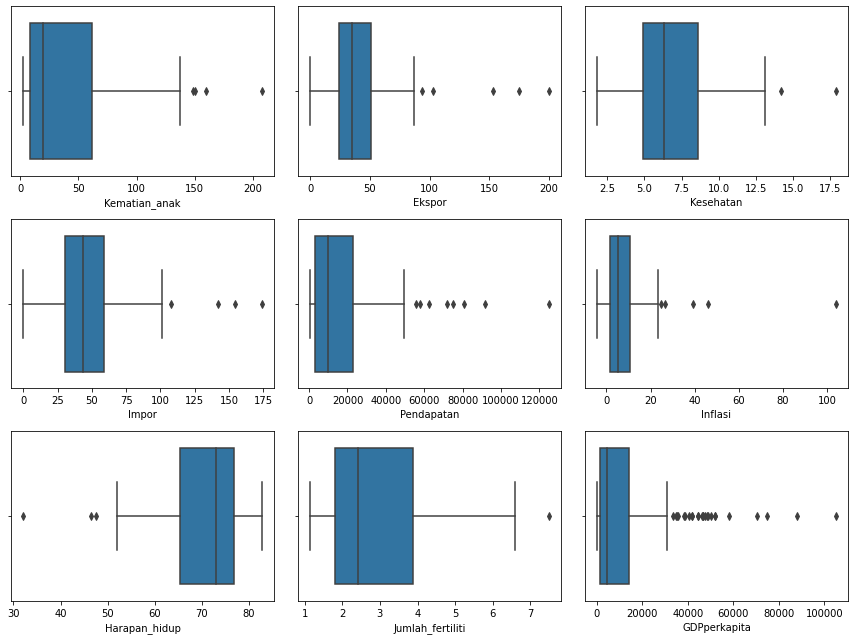

In [ ]:
#checking outlier data

ekonomi = pd.DataFrame(data = df, columns=['Negara','Pendapatan','GDPperkapita','Inflasi','Ekspor','Impor'])
kesehatan = pd.DataFrame(data=df, columns=['Negara','Kesehatan','Jumlah_fertiliti','Kematian_anak','Harapan_hidup'])

print('Outlier')
plt.figure(figsize=(12,9))
for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.boxplot(df[i[1]])
plt.tight_layout()
plt.show()


In [ ]:
def handling_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  Lb = Q1 - (IQR*1.5)
  Ub = Q3 + (IQR*1.5)
  return df[(df>Lb)&(df<Ub)]

data = handling_outlier(df[['Jumlah_fertiliti','Kematian_anak','Harapan_hidup']]).dropna(axis=0)
print(data.shape)

(161, 3)


In [ ]:
data.describe()

,Jumlah_fertiliti,Kematian_anak,Harapan_hidup
count,161.000000,161.000000,161.000000
mean,2.864534,34.170186,71.344099
std,1.446881,34.274261,7.850875
min,1.150000,2.600000,52.000000
25%,1.780000,7.800000,65.900000
50%,2.340000,18.900000,73.400000
75%,3.660000,55.200000,76.900000
max,6.550000,137.000000,82.800000


# Scalling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dsc = sc.fit_transform(data[['Jumlah_fertiliti','Kematian_anak']])

## Clustering (KMeans)

n_cluster=2


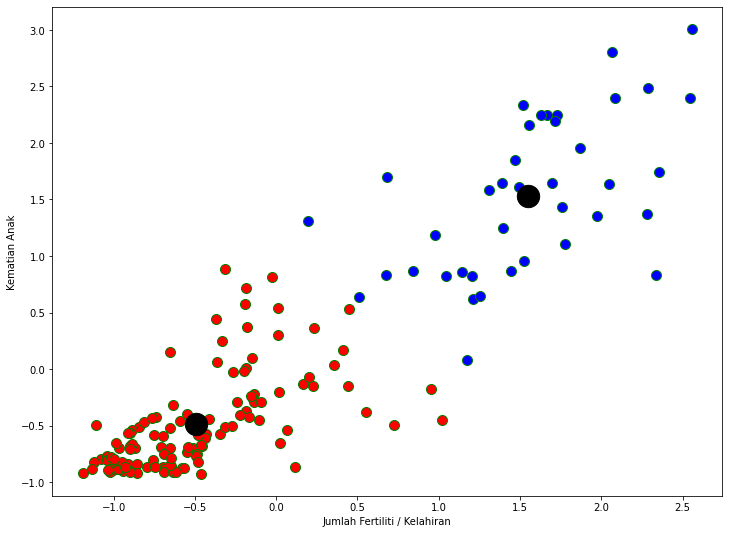

Elbow graph


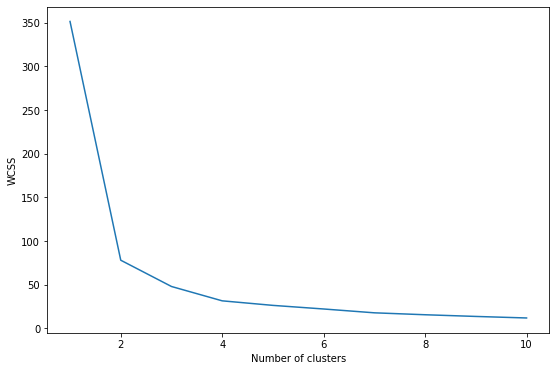

In [ ]:
from sklearn.cluster import KMeans

kmeans_k1 = KMeans(n_clusters=2).fit(dsc)
labels_k1 = kmeans_k1.labels_

data_sc_k1 = pd.DataFrame(data=dsc, columns= ['Jumlah_fertiliti','Kematian_anak'])
data_sc_k1['label_kmeans1'] = labels_k1

import matplotlib.pyplot as plt
print('n_cluster=2')
plt.figure(figsize=(12,9))
plt.scatter(data_sc_k1['Jumlah_fertiliti'][data_sc_k1['label_kmeans1'] == 0], data_sc_k1['Kematian_anak'][data_sc_k1['label_kmeans1'] == 0], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data_sc_k1['Jumlah_fertiliti'][data_sc_k1['label_kmeans1'] == 1], data_sc_k1['Kematian_anak'][data_sc_k1['label_kmeans1'] == 1], c='blue', s=100, edgecolor='green', linestyle='-')

centers_k1 = kmeans_k1.cluster_centers_
plt.scatter(centers_k1[:,0], centers_k1[:,1], c='black', s=500)
plt.xlabel('Jumlah Fertiliti / Kelahiran')
plt.ylabel('Kematian Anak')
plt.show()

#elbow
print('Elbow graph')
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(data_sc_k1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_cluster=3


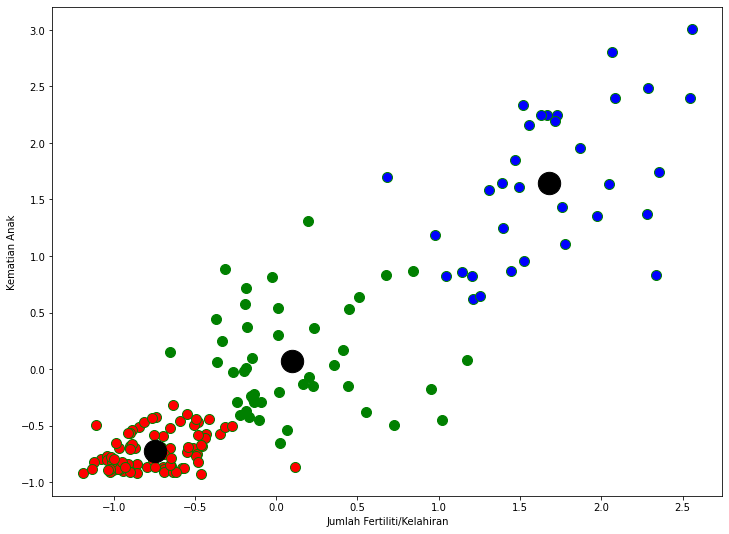

In [ ]:
#visualisasi & clustering k=3

kmeans_k2 = KMeans(n_clusters=3).fit(dsc)
labels_k2 = kmeans_k2.labels_

data_sc_k2 = pd.DataFrame(data=dsc, columns= ['Jumlah_fertiliti','Kematian_anak'])
data_sc_k2['label_kmeans1'] = labels_k2

import matplotlib.pyplot as plt
print('n_cluster=3')
plt.figure(figsize=(12,9))
plt.scatter(data_sc_k2['Jumlah_fertiliti'][data_sc_k2['label_kmeans1'] == 0], data_sc_k2['Kematian_anak'][data_sc_k2['label_kmeans1'] == 0], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(data_sc_k2['Jumlah_fertiliti'][data_sc_k2['label_kmeans1'] == 1], data_sc_k2['Kematian_anak'][data_sc_k2['label_kmeans1'] == 1], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(data_sc_k2['Jumlah_fertiliti'][data_sc_k2['label_kmeans1'] == 2], data_sc_k2['Kematian_anak'][data_sc_k2['label_kmeans1'] == 2], c='green', s=100, edgecolor='green', linestyle='-')

centers_k2 = kmeans_k2.cluster_centers_
plt.scatter(centers_k2[:,0], centers_k2[:,1], c='black', s=500)
plt.xlabel('Jumlah Fertiliti/Kelahiran')
plt.ylabel('Kematian Anak')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(dsc, labels= labels_k1))
print(silhouette_score(dsc, labels= labels_k2))

0.6898198207391123
0.5506433400287353


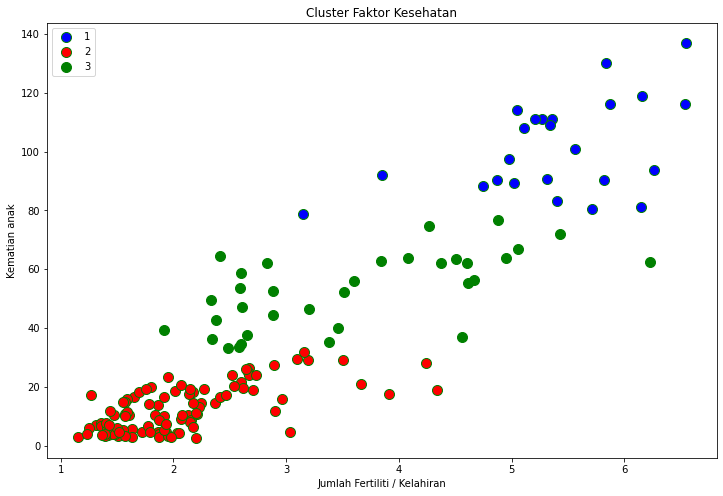

In [ ]:
#Inverse_Transform
from sklearn.cluster import KMeans

kmeans_k = KMeans(n_clusters = 3, random_state=42)
kmeans_k.fit(sc.inverse_transform(dsc))
labels_k = kmeans_k.labels_

##kesehatan
data_k = pd.DataFrame(data=sc.inverse_transform(dsc), columns=['Jumlah_fertiliti','Kematian_anak'])
data_k['label2_kmeans'] = labels_k

plt.figure(figsize=(12,8))
plt.scatter(data_k['Jumlah_fertiliti'][data_k.label2_kmeans == 0], data_k['Kematian_anak'][data_k.label2_kmeans == 0], c='blue', label='1', s=100, edgecolor='green')
plt.scatter(data_k['Jumlah_fertiliti'][data_k.label2_kmeans == 1], data_k['Kematian_anak'][data_k.label2_kmeans == 1], c='red', label='2', s=100, edgecolor='green')
plt.scatter(data_k['Jumlah_fertiliti'][data_k.label2_kmeans == 2], data_k['Kematian_anak'][data_k.label2_kmeans == 2], c='green',label = '3', s=100, edgecolor='green')

plt.legend()
plt.title('Cluster Faktor Kesehatan')
plt.xlabel('Jumlah Fertiliti / Kelahiran')
plt.ylabel('Kematian anak')
plt.savefig('Klasterisasi.png')
plt.show()



# Summary / Report

In [ ]:
data_k

,Jumlah_fertiliti,Kematian_anak,label2_kmeans
0,5.82,90.2,0
1,1.65,16.6,1
2,2.89,27.3,1
3,6.16,119.0,0
4,2.13,10.3,1
...,...,...,...
156,3.50,29.2,1
157,2.47,17.1,1
158,1.95,23.3,1
159,4.67,56.3,2


In [ ]:
df3 = pd.merge(df,data_k, how='outer')
df3['K_means_labels'] = pd.Series(labels_k).astype('object')
df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')

df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,1.0,NaN
205,NaN,8.6,NaN,NaN,NaN,NaN,NaN,NaN,1.87,NaN,1.0,NaN
206,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,1.92,NaN,1.0,NaN
207,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,1.93,NaN,1.0,NaN


In [ ]:
high_kematian = df3[df3['label2_kmeans']==0]
high_kematian.sort_values('Kematian_anak', ascending='False')[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
84,Lao,78.9,35.4,4.47,49.3,3980.0,9.20,63.8,3.15,1140.0,0.0,0
56,Gambia,80.3,23.8,5.69,42.7,1660.0,4.30,65.5,5.71,562.0,0.0,1
155,Uganda,81.0,17.1,9.01,28.6,1540.0,10.60,56.8,6.15,595.0,0.0,2
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460.0,0.0,NaN
36,Comoros,88.2,16.5,4.51,51.7,1410.0,3.87,65.9,4.75,769.0,0.0,2
88,Liberia,89.3,19.1,11.80,92.6,700.0,5.47,60.8,5.02,327.0,0.0,1
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0.0,0
150,Togo,90.3,40.2,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,0.0,1
94,Malawi,90.5,22.8,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,0.0,1
116,Pakistan,92.1,13.5,2.20,19.4,4280.0,10.90,65.3,3.85,1040.0,0.0,1


In [ ]:
high_kematian.sort_values('Pendapatan', ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,0.0,1
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,0.0,1
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,0.0,0
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0,0.0,1
94,Malawi,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,0.0,1
63,Guinea,109.0,30.30,4.93,43.2,1190.0,16.10,58.0,5.34,648.0,0.0,2
150,Togo,90.3,40.20,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,0.0,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390.0,2.97,55.6,5.05,547.0,0.0,1
36,Comoros,88.2,16.50,4.51,51.7,1410.0,3.87,65.9,4.75,769.0,0.0,2
155,Uganda,81.0,17.10,9.01,28.6,1540.0,10.60,56.8,6.15,595.0,0.0,2


In [ ]:
df['K_means_labels'] = pd.Series(labels_k).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


In [ ]:
kematian_tinggi = df[df['K_means_labels']==0]
print('Negara dengan klaster kematian tertinggi', kematian_tinggi.shape)
list_kematian = kematian_tinggi.sort_values('Kematian_anak', ascending=False).reset_index()
list_kematian.drop(columns=['index','K_means_labels'])

Negara dengan klaster kematian tertinggi (24, 11)


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
1,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
2,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
3,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
4,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
5,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
6,Lao,78.9,35.40,4.47,49.3,3980,9.200,63.8,3.15,1140
7,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740
8,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490
9,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600


In [ ]:
klaster_tinggi = list_kematian.drop(columns=['index','K_means_labels'])
klaster_tinggi.to_excel("List klaster Negara Kematian tertinggi.xlsx")

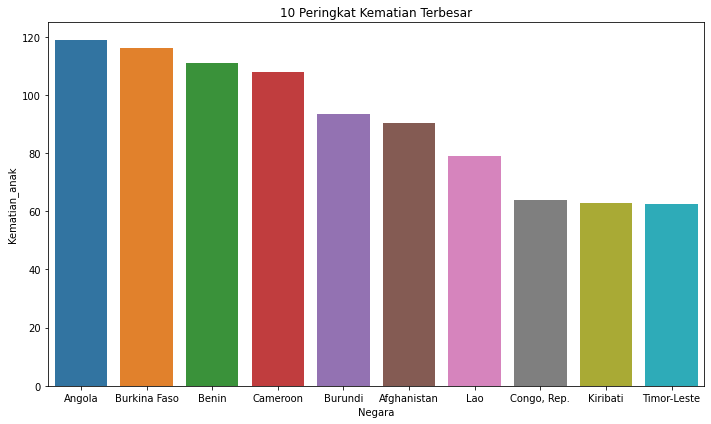

In [ ]:
top_kematian = kematian_tinggi.sort_values('Kematian_anak', ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(top_kematian['Negara'], top_kematian['Kematian_anak'])
plt.title('10 Peringkat Kematian Terbesar')
plt.tight_layout()
plt.show()


In [ ]:
high_harapan = kematian_tinggi.sort_values('Harapan_hidup', ascending=False)[:10]
low_harapan = kematian_tinggi.sort_values('Harapan_hidup', ascending=True)[:10]
low_kelahiran = kematian_tinggi.sort_values('Jumlah_fertiliti', ascending=True)[:10]
top_kelahiran = kematian_tinggi.sort_values('Jumlah_fertiliti', ascending=False)[:10]

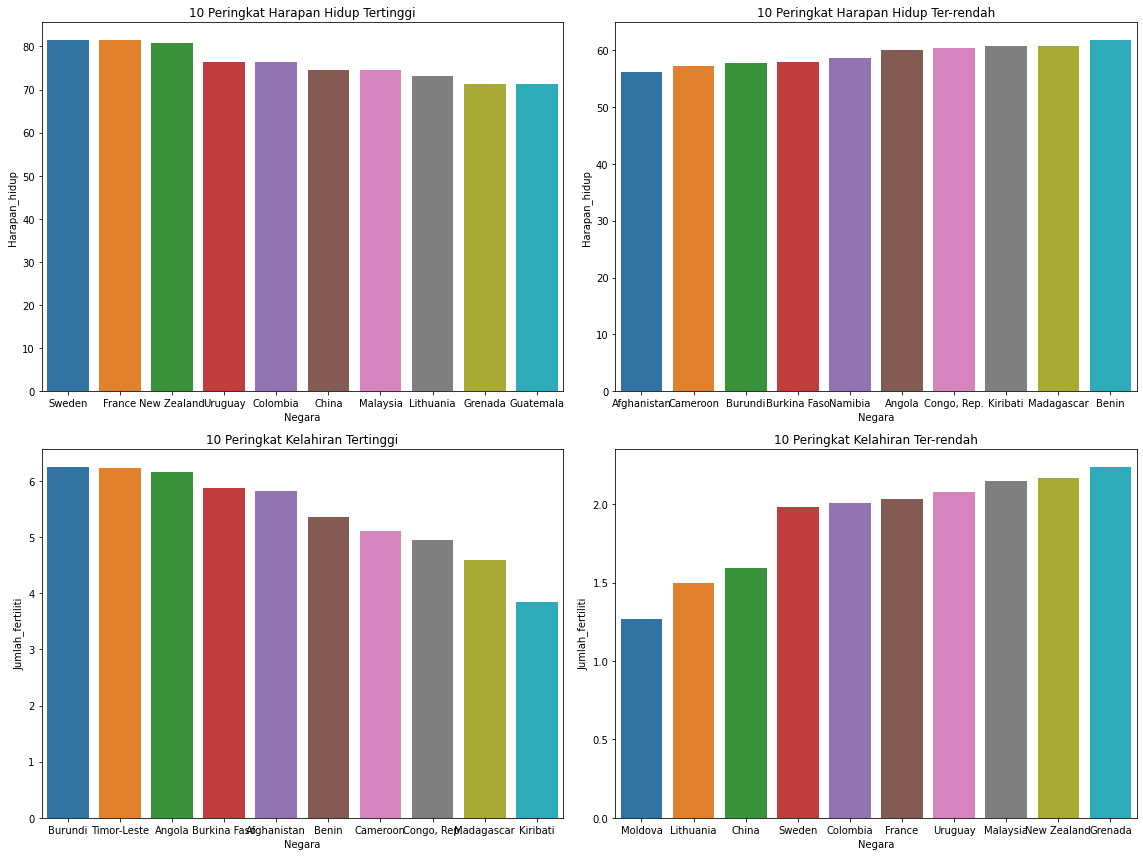

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.barplot(high_harapan['Negara'], high_harapan['Harapan_hidup'])
plt.title('10 Peringkat Harapan Hidup Tertinggi')
plt.subplot(2,2,2)
sns.barplot(low_harapan['Negara'], low_harapan['Harapan_hidup'])
plt.title('10 Peringkat Harapan Hidup Ter-rendah')
plt.subplot(2,2,3)
sns.barplot(top_kelahiran['Negara'], top_kelahiran['Jumlah_fertiliti'])
plt.title('10 Peringkat Kelahiran Tertinggi')
plt.subplot(2,2,4)
sns.barplot(low_kelahiran['Negara'], low_kelahiran['Jumlah_fertiliti'])
plt.title('10 Peringkat Kelahiran Ter-rendah')

plt.tight_layout()
plt.show()

In [ ]:
high_pendapatan = kematian_tinggi.sort_values('Pendapatan', ascending=False)[:10]
low_pendapatan = kematian_tinggi.sort_values('Pendapatan', ascending=True)[:10]
high_GDP = kematian_tinggi.sort_values('GDPperkapita', ascending=False)[:10]
low_GDP = kematian_tinggi.sort_values('GDPperkapita', ascending=True)[:10]

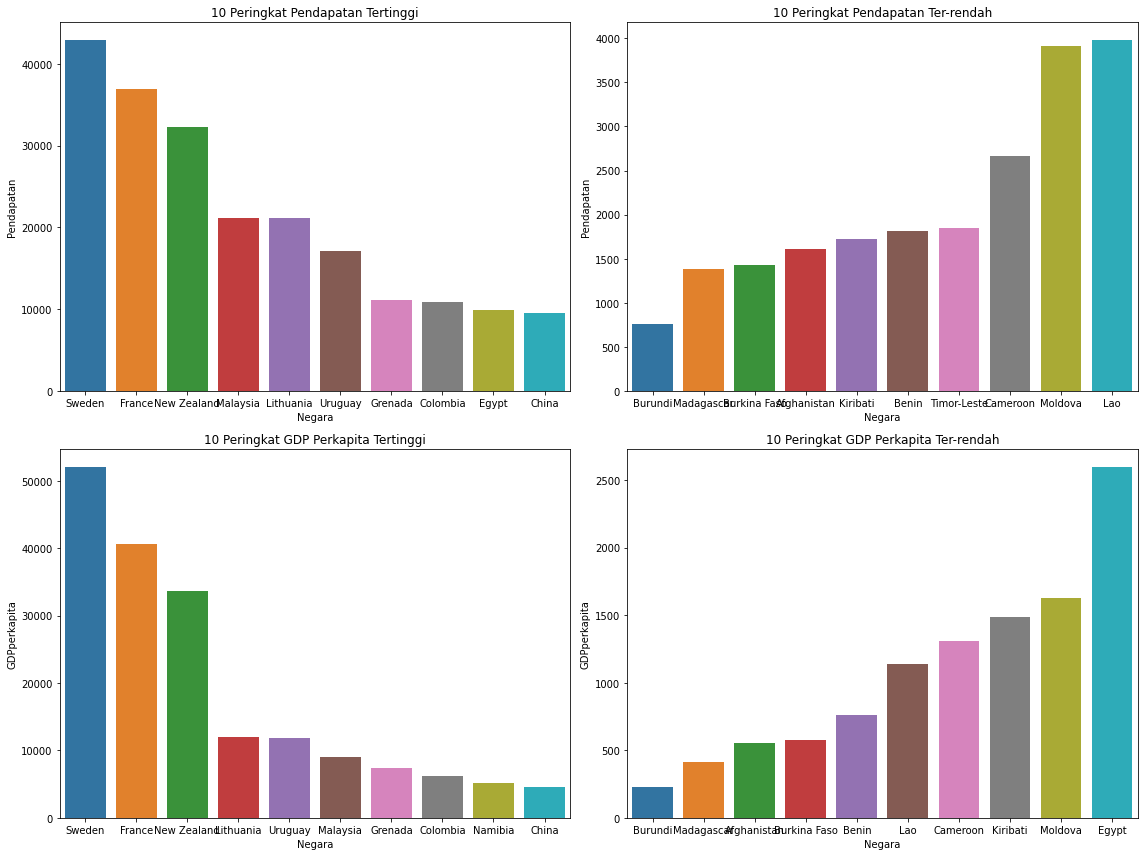

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.barplot(high_pendapatan['Negara'], high_pendapatan['Pendapatan'])
plt.title('10 Peringkat Pendapatan Tertinggi')
plt.subplot(2,2,2)
sns.barplot(low_pendapatan['Negara'], low_pendapatan['Pendapatan'])
plt.title('10 Peringkat Pendapatan Ter-rendah')
plt.subplot(2,2,3)
sns.barplot(high_GDP['Negara'], high_GDP['GDPperkapita'])
plt.title('10 Peringkat GDP Perkapita Tertinggi')
plt.subplot(2,2,4)
sns.barplot(low_GDP['Negara'], low_GDP['GDPperkapita'])
plt.title('10 Peringkat GDP Perkapita Ter-rendah')
plt.tight_layout()
plt.show()

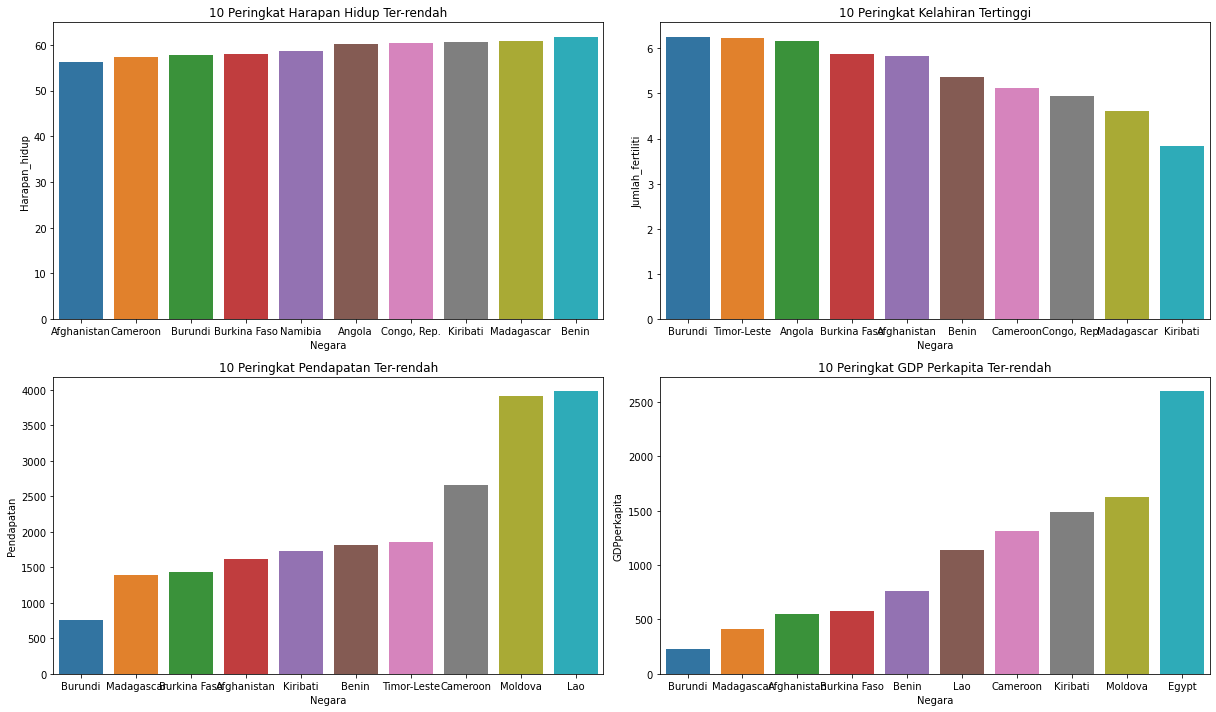

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.barplot(low_harapan['Negara'], low_harapan['Harapan_hidup'])
plt.title('10 Peringkat Harapan Hidup Ter-rendah')
plt.subplot(2,2,2)
sns.barplot(top_kelahiran['Negara'], top_kelahiran['Jumlah_fertiliti'])
plt.title('10 Peringkat Kelahiran Tertinggi')
plt.subplot(2,2,3)
sns.barplot(low_pendapatan['Negara'], low_pendapatan['Pendapatan'])
plt.title('10 Peringkat Pendapatan Ter-rendah')
plt.subplot(2,2,4)
sns.barplot(low_GDP['Negara'], low_GDP['GDPperkapita'])
plt.title('10 Peringkat GDP Perkapita Ter-rendah')

plt.tight_layout()
#plt.savefig("Visualisasi_akhir.png")
plt.show()

In [ ]:
kesehatan = pd.merge(top_kelahiran, low_harapan, how='inner').drop(columns='K_means_labels')
kesehatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
1,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
2,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
3,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
4,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
5,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
6,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740
7,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413
8,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490


In [ ]:
low_ekonomi = pd.merge(low_GDP, low_pendapatan, how='inner').drop(columns='K_means_labels')
low_ekonomi

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
1,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413
2,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
4,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
5,Lao,78.9,35.40,4.47,49.3,3980,9.200,63.8,3.15,1140
6,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
7,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490
8,Moldova,17.2,39.20,11.70,78.5,3910,11.100,69.7,1.27,1630


In [ ]:
kandidat = pd.merge(kesehatan, low_ekonomi, how='inner')
kandidat

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
1,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
2,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
4,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
5,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413
6,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490


In [ ]:
kandidat.to_excel("List Kandidat Negara Penerima Bantuan.xlsx")